In [2]:
import numpy as np
import scipy
import ujson
import os
import pandas as pd
from scipy import sparse
from scipy.sparse import linalg
from matplotlib import pyplot as plt


In [3]:
data_dir = "../data/"
f_collab_distance = os.path.join(data_dir, "collaboration_distances.csv")
df_collab_distance = pd.read_csv(f_collab_distance)
faculties = list(df_collab_distance.columns)    # Obtain a list of facauty names
faculties.pop(0)
num_ppl = len(faculties)
pass

## Citation data

#### Read data from json file to sparse matrix

In [13]:
############## Citation #####################
f_citation = os.path.join(data_dir, "cite_pool.json")
with open(f_citation) as file:
    citations = ujson.load(file)
    pass

last_person = ""
n_col = 0
for key, val in citations.items():
    cur = key.split("'")[1]
    if last_person != cur and n_col > 0:
        break

    last_person = cur
    n_col += 1


data_citation = scipy.sparse.lil_matrix((num_ppl, n_col), dtype="double")

i = 0
j = 0
for key, val in citations.items():
    if (j >= n_col):
        i += 1
        j = 0
    
    data_citation[i, j] = val

    j += 1

data_citation = data_citation.tocsr()

#################################### Classification #####################
f_classification = os.path.join(data_dir, "classification_code_matrix.csv")
df_classification = pd.read_csv(f_classification)
classification = df_classification.to_numpy()[:, 1:].astype(np.float64)
data_classification = scipy.sparse.csr_array(data_citation)


#### Perform partial SVD to compute the largest k singular values

#### Citation Data

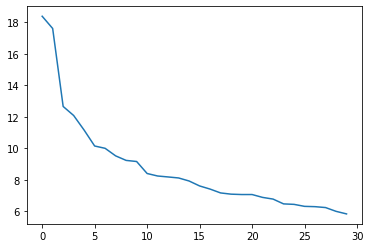

In [14]:
U, S, Vt = scipy.sparse.linalg.svds(data_citation, k=30)
plt.plot(np.flip(S))

#### Classification Data

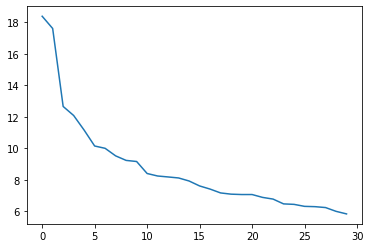

In [15]:
U, S, Vt = scipy.sparse.linalg.svds(data_classification, k=30)
plt.plot(np.flip(S))